In [1]:
from astroquery.gaia import Gaia

# Import data science packages
import pandas as pd

# Import NumPy to do mathy stuff
import numpy as np

In [2]:
from numpy import genfromtxt

my_data = genfromtxt('Pleiades_Cluster.csv', delimiter=',')

In [3]:
m=my_data[:,0]
b=my_data[:,3]
d=1000/b
dd = np.log10(d)
mag= m+5-(5*dd)
mag

array([        nan,  8.39620227,  2.02095008, 10.75161899,  6.9856787 ,
        8.5908896 , 12.07080772, 10.67841896,  6.77373424, 11.7071565 ,
       11.30100154,  7.82522142, -1.6601527 , -0.99929937, 12.94017076,
        9.6909438 , -1.0256094 ,  4.54299894,  3.7625361 ,  4.05339972,
        4.9937859 ,  2.3471435 ,  9.30248632,  2.61470336, 11.18732335,
       11.37188566,  7.70231919,  7.72592979, 13.34170451, 10.97326261,
        7.67014979, 11.72783817, 11.71349514, 13.40052524,  6.08199148,
        7.42119309,  9.5426059 ,  9.32827104,  2.66977032,  7.69909128,
       -0.37538144, 10.27185984, 12.58498445, 14.09089217,  8.02710239,
       12.78664932,  8.88638087, 11.67758309,  9.4350065 ,  4.27313372,
        8.17668705, 10.40871437, 10.73598933, 11.85397502, 11.94902951,
        5.20034061, 11.98807328, 12.61957602,  7.34914962, 11.45601318,
       11.26591677, 10.32676656,  7.8236375 , 10.17685985,  8.57061168,
       11.43302825,  9.55848498, 12.08968966,  8.00351422,  8.44

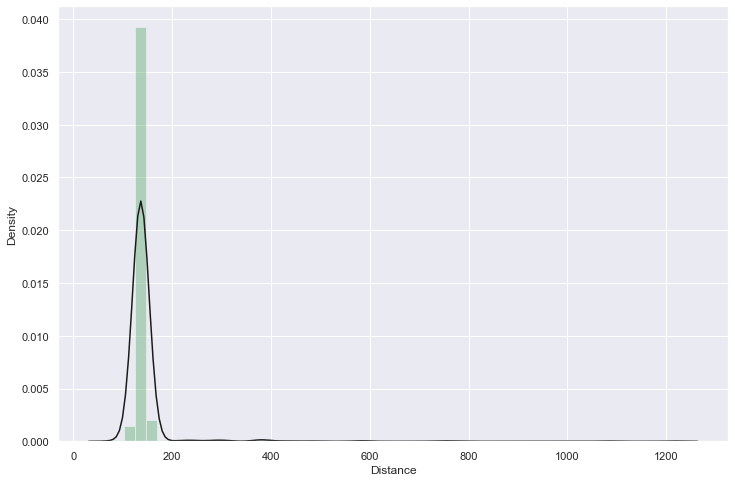

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
df = pd.DataFrame(d)

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,8))

sns.distplot(df ,kde_kws={"color": "k"},hist_kws={"color": "g"})
plt.xlabel("Distance")
plt.show()

In [5]:
print("Highest allowed",df.mean() + 3*df.std())
print("Lowest allowed",df.mean() - 3*df.std())

Highest allowed 0    333.655166
dtype: float64
Lowest allowed 0   -45.878504
dtype: float64


In [6]:
upper_limit = df.mean() + 3*df.std()
lower_limit = df.mean() - 3*df.std()
df = np.where(
    df>upper_limit,
    upper_limit,
    np.where(
        df<lower_limit,
        lower_limit,
        df
    )
)

In [7]:
dfinal=pd.DataFrame(df)
dfinal

,0
0,NaN
1,286.809906
2,124.578559
3,117.511076
4,154.004943
...,...
983,173.016572
984,138.380855
985,333.655166
986,333.655166


In [8]:
dfinal.describe()

,0
count,987.000000
mean,140.346183
std,27.628481
min,78.897430
25%,133.651233
50%,136.344032
75%,139.414500
max,333.655166


Therefore the mean value is 140.346183

**Q2 LUMINOSITY AND TEMPERATURE**

In [9]:
new_my_data=pd.DataFrame(my_data)
new_my_data
df4 = new_my_data.dropna()
print(df4)

             0          1          2         3         4         5          6  \
1    15.684173  58.452096  23.485778  3.486630  2.192428  0.062333  3797.0000   
4    12.923352  56.999005  24.731093  6.493298  1.591153  0.156267  4456.1650   
5    16.454210  55.865759  24.270604  2.675075  2.346289  0.050944  3830.0100   
8    12.179868  55.676693  23.502644  8.294176  1.369455  0.165852  4861.0350   
11   14.584626  55.786541  23.251838  4.447532  1.873214  0.085902  4112.1074   
..         ...        ...        ...       ...       ...       ...        ...   
980   9.779877  56.710653  23.239006  6.497724  0.746530  2.140879  5945.6665   
983  11.852763  56.920869  22.929795  5.779793  1.404244  0.513834  4526.7550   
984   8.186488  55.930264  24.374396  7.226433  0.352915  7.839014  7963.1953   
985  15.502478  56.525937  25.112616  2.085063  1.515169  0.141687  4443.0000   
987  11.906063  57.765432  22.840395  4.196960  1.102659  0.816104  4947.1800   

            7  
1    0.5769

In [10]:
arr = df4.to_numpy()

m1=arr[:,0]
b1=arr[:,3]
d1=1000/b1

dd1 = np.log10(d1)

mag1=m1+5-(5*dd1)
lum_val=arr[:,5]

In [11]:
k=(4.77-mag1)/2.5
lum_cal=np.power(10,k)
lum_cal

array([3.54420712e-02, 1.29935709e-01, 2.96240315e-02, 1.57945154e-01,
       5.99668768e-02, 1.23253830e+00, 2.52921390e+00, 1.93481797e+00,
       8.13739956e-01, 9.31413656e+00, 7.27978673e+00, 6.71540679e-02,
       6.57094879e-02, 6.91735532e-02, 2.98678120e-01, 8.70007038e-02,
       1.50207489e-02, 6.91977340e+00, 6.73540147e-02, 4.97919397e-02,
       4.33835593e-02, 6.72765569e-01, 9.29694264e-02, 6.00544233e-02,
       3.01825082e-02, 2.84793208e-01, 6.35570081e-02, 4.35699176e-02,
       1.65444836e-02, 3.23972996e-01, 1.39090623e-01, 8.75298153e-01,
       1.01303865e+00, 1.42671781e+00, 4.95505331e-01, 7.76253509e-02,
       7.14542527e-02, 5.10216521e-01, 3.67712490e-02, 6.24492598e-02,
       2.53293194e-01, 1.37828954e+00, 6.28833471e-02, 1.23882542e-01,
       2.87818789e-02, 7.34662833e-01, 3.09488891e+00, 1.16464735e-02,
       6.05638192e-02, 2.95644153e+00, 5.45413569e-02, 2.60119516e-02,
       7.77464805e-01, 1.06992171e-01, 4.82090882e-01, 2.48856086e-01,
      

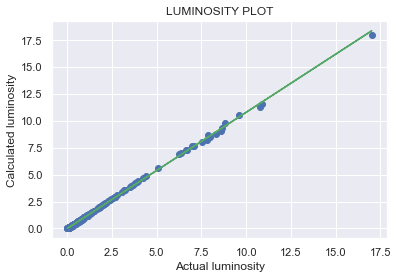

In [12]:
x=lum_val
y=lum_cal

plt.plot(x,y,'o')
z = np.polyfit(x, y, 1)
pt = np.poly1d(z)
plt.xlabel("Actual luminosity")
plt.ylabel("Calculated luminosity")
plt.title("LUMINOSITY PLOT")
plt.plot(x,pt(x),"g")

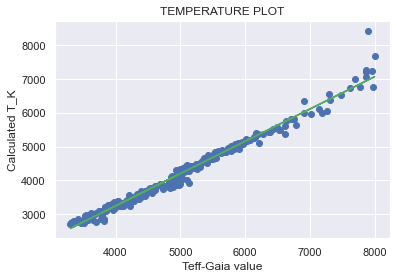

In [13]:
color=arr[:,4]
p=np.power((color+0.4),(2/3))
temp_cal=5601/p
teff=arr[:,6]
x=teff
y=temp_cal
plt.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
pt = np.poly1d(z)
plt.xlabel("Teff-Gaia value")
plt.ylabel("Calculated T_K")
plt.title("TEMPERATURE PLOT")
plt.plot(x,pt(x),"g")

In [14]:
rad_val=arr[:,7]
lm=np.power(lum_cal,0.5)
tem=np.power((5800/temp_cal),2)
rad_cal=tem*lm
rad_cal

array([0.71894098, 0.96826739, 0.70980956, 0.9120755 , 0.78487579,
       1.5288334 , 2.00637999, 1.80886013, 1.33289915, 2.09457438,
       2.11221924, 0.90367129, 0.75096627, 0.74687298, 1.18015794,
       0.87107677, 0.53501146, 2.44874406, 0.8437827 , 0.70388389,
       0.75402988, 1.50145623, 0.80461389, 0.74025644, 0.67640272,
       1.03911589, 0.74126456, 0.68398755, 0.57907668, 1.06442449,
       1.07974098, 1.6848476 , 1.57887984, 1.8334189 , 1.19791698,
       0.8293305 , 0.77847993, 1.28448977, 0.64224957, 0.76839387,
       1.21379185, 1.62040685, 0.73583091, 0.86211637, 0.71354894,
       1.34190875, 1.96325675, 0.48386447, 0.73351314, 1.9651681 ,
       0.71321161, 0.72467854, 1.56059648, 0.83461363, 1.2209614 ,
       0.99942419, 1.36318198, 0.5477416 , 0.97531027, 0.88772401,
       0.64036839, 1.45257911, 0.91173431, 2.03630724, 0.70570718,
       1.68244112, 1.20313412, 0.51331665, 1.22596121, 0.72050133,
       0.59544065, 0.86185171, 0.94277981, 1.63787343, 0.97697

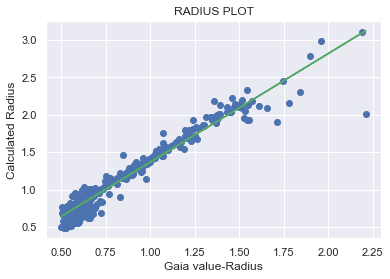

In [15]:
x=rad_val
y=rad_cal
plt.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
pt = np.poly1d(z)
plt.xlabel("Gaia value-Radius")
plt.ylabel("Calculated Radius")
plt.title("RADIUS PLOT")
plt.plot(x,pt(x),"g")


**Q3 BRIGHTNESS AND POSITION IN NIGHT SKY**

In [16]:
gmag=pd.DataFrame(m)
gmag.max()

0    19.885986
dtype: float64

In [17]:
brightness=gmag.max()-gmag
brightness

,0
0,NaN
1,4.201813
2,12.387819
3,3.783973
4,6.962634
...,...
983,8.033223
984,11.699498
985,4.383508
986,2.463916


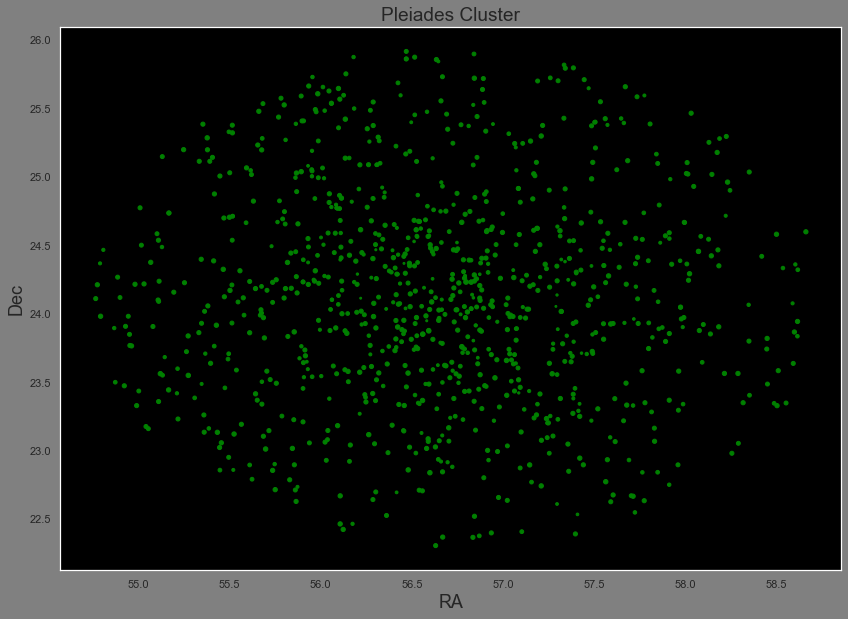

In [18]:
plt.figure(figsize=(14,10), facecolor="grey")
plt.subplot( 111,facecolor="black")
x_values = my_data[:,1]
y_values = my_data[:,2]
s = m
plt.scatter(x_values, y_values, s, color="green",)
plt.xlabel("RA", size=18)
plt.ylabel("Dec",size=18)
plt.title("Pleiades Cluster",size=19)
plt.grid()

In [19]:
x=my_data[:,4]
y=mag

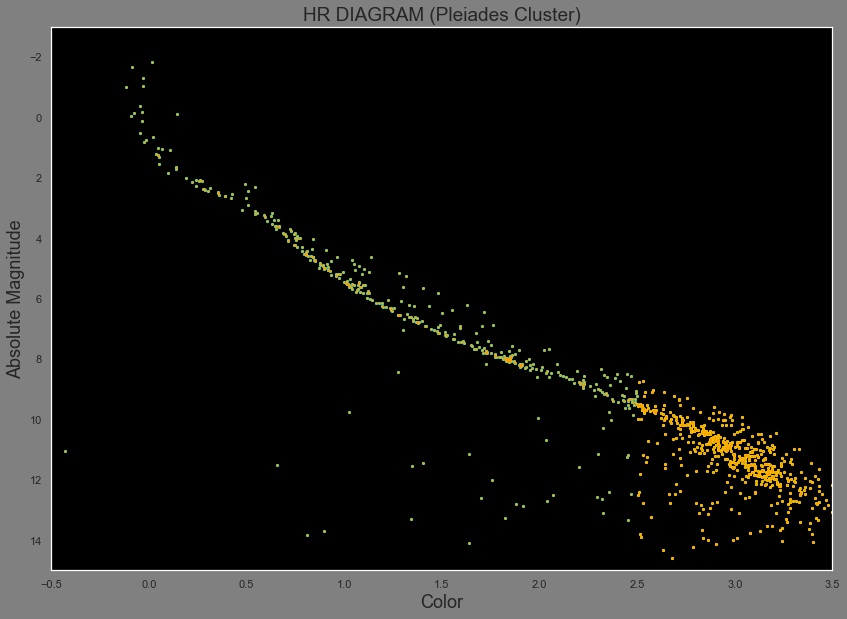

In [20]:
plt.figure(figsize=(14,10), facecolor="grey")
ax=plt.subplot( 111,facecolor="black")

plt.gca().invert_yaxis()
plt.grid()
ax.set_xlim(-0.5,3.5)
ax.set_ylim(15,-3)
col =[]
  
for i in range(0, len(x)):
    if x[i]<2.5:
        col.append("cyan")  
    else:
        col.append("yellow") 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 10,
                linewidth = 0)
plt.scatter(x, y, s=2, color="#FF9E00")
plt.xlabel("Color", size=18)
plt.ylabel("Absolute Magnitude",size=18)

plt.title("HR DIAGRAM (Pleiades Cluster)",size=19)
plt.show()

The turnoff point is (0.6,2.8)

For calculating the age of cluster, we first need to find the turnoff mass
Using the mass-luminosity relationship for main sequence stars:

L ∼ M^n

n=2.5 (different for different stellar object)

L = 2.8


In [21]:
Mass=np.power(2.8,(1/2.5))
Mass

1.5096046070047022

Now,

Using this relation we can find the time ratio

In [22]:
t0=np.power(Mass,-2.5)
t0

0.3571428571428571

In [23]:
age = t0 * 4.603e9 #multiplication with sun's age
age

1643928571.4285712

Therefore the approximate age of cluster is 1643928571.4285712 years